In [1]:
import pandas as pd

# Loading data into dataframe
  1. Since the data is in form of excel I used read_excel to load the data.

In [2]:
train_data=pd.read_excel("Data_Train.xlsx")
test_data=pd.read_excel("Test_set.xlsx")

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

2. Since there is only one row with null value we can drop it.

In [5]:
train_data.dropna(inplace =True)

In [6]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

# Exploratory Data analysis
 
 1. Since the Data contains columns of type datetime we need to convert them to timestamp inorder to use them in our analysis.

In [7]:
#Extracting Journey date and month

train_data['Journey_month']=pd.to_datetime(train_data['Date_of_Journey'],format='%d/%m/%Y').dt.month
train_data['Journey_day']=pd.to_datetime(train_data['Date_of_Journey'],format='%d/%m/%Y').dt.day

In [8]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_month,Journey_day
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [9]:
pd.set_option('display.max_columns', None)

In [10]:
#Extracting Departure hours and minutes

train_data['Departure_hours']=pd.to_datetime(train_data['Dep_Time']).dt.hour
train_data['Departure_minutes']=pd.to_datetime(train_data['Dep_Time']).dt.minute

In [11]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_month,Journey_day,Departure_hours,Departure_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,16,50


In [12]:
# Dropping Date_of_Journey and Dep_Time columns as they are of no use any further

train_data.drop('Date_of_Journey',axis=1,inplace=True)
train_data.drop('Dep_Time',axis=1,inplace=True)

In [13]:
# Extracting Arrival hours and minutes

train_data['Arrival_hours']=pd.to_datetime(train_data['Arrival_Time']).dt.hour
train_data['Arrival_minutes']=pd.to_datetime(train_data['Arrival_Time']).dt.minute

# Dropping Arrival_Time column

train_data.drop('Arrival_Time',axis=1,inplace=True)

In [14]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_month,Journey_day,Departure_hours,Departure_minutes,Arrival_hours,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [15]:
duration=list(train_data["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]
duration_hours=[]
duration_min=[]

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    duration_min.append(int(duration[i].split(sep="m")[0].split()[-1]))

In [16]:
train_data.drop("Duration",axis=1,inplace=True)

In [17]:
train_data.head()


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_month,Journey_day,Departure_hours,Departure_minutes,Arrival_hours,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35


In [18]:
from matplotlib import pyplot as plt
import seaborn as sns

# Handling Categorical data
1. Used one hot encoder for nominal data and label encoder for ordinal data

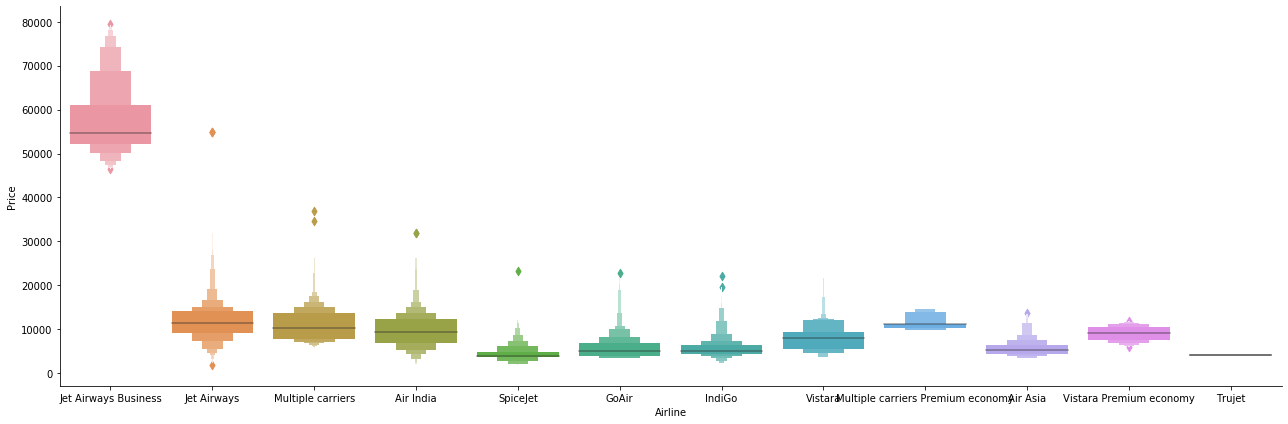

In [19]:
sns.catplot(y="Price",x="Airline",data=train_data.sort_values("Price",ascending=False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [20]:
Airline_dummies=pd.get_dummies(train_data['Airline'],drop_first=True,prefix="Airline")
Source_dummies=pd.get_dummies(train_data['Source'],drop_first=True,prefix="Source")
Dest_dummies=pd.get_dummies(train_data['Destination'],drop_first=True,prefix="Dest")

In [21]:
train_data=pd.concat([train_data,Airline_dummies,Source_dummies,Dest_dummies],axis=1)

In [22]:
train_data.drop('Route',axis=1,inplace=True)
train_data.drop('Additional_Info',axis=1,inplace=True)


In [23]:
train_data.drop('Airline',axis=1,inplace=True)
train_data.drop('Source',axis=1,inplace=True)
train_data.drop('Destination',axis=1,inplace=True)

In [24]:
train_data.head()

,Total_Stops,Price,Journey_month,Journey_day,Departure_hours,Departure_minutes,Arrival_hours,Arrival_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata,Dest_New Delhi
0,non-stop,3897,3,24,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2 stops,7662,5,1,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2 stops,13882,6,9,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1 stop,6218,5,12,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1 stop,13302,3,1,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [25]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [26]:
#Label Encoding

train_data.replace({'non-stop': 0,'1 stop': 1,'2 stops': 2,'3 stops': 3,'4 stops': 4},inplace=True)

# Test Dataset

In [27]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True,prefix="Airline")

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True,prefix="Source")

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True,prefix="Dest")

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)



Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

# Feature Selection


In [28]:
X=train_data.drop("Price",axis=1)

In [29]:
Y=train_data["Price"]

In [30]:
X.head()

,Total_Stops,Journey_month,Journey_day,Departure_hours,Departure_minutes,Arrival_hours,Arrival_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata,Dest_New Delhi
0,0,3,24,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,5,1,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,6,9,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,5,12,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,3,1,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [31]:
X.isnull().sum()

Total_Stops                                  0
Journey_month                                0
Journey_day                                  0
Departure_hours                              0
Departure_minutes                            0
Arrival_hours                                0
Arrival_minutes                              0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Chennai                               0
Source_Delhi                                 0
Source_Kolkata                               0
Source_Mumbai

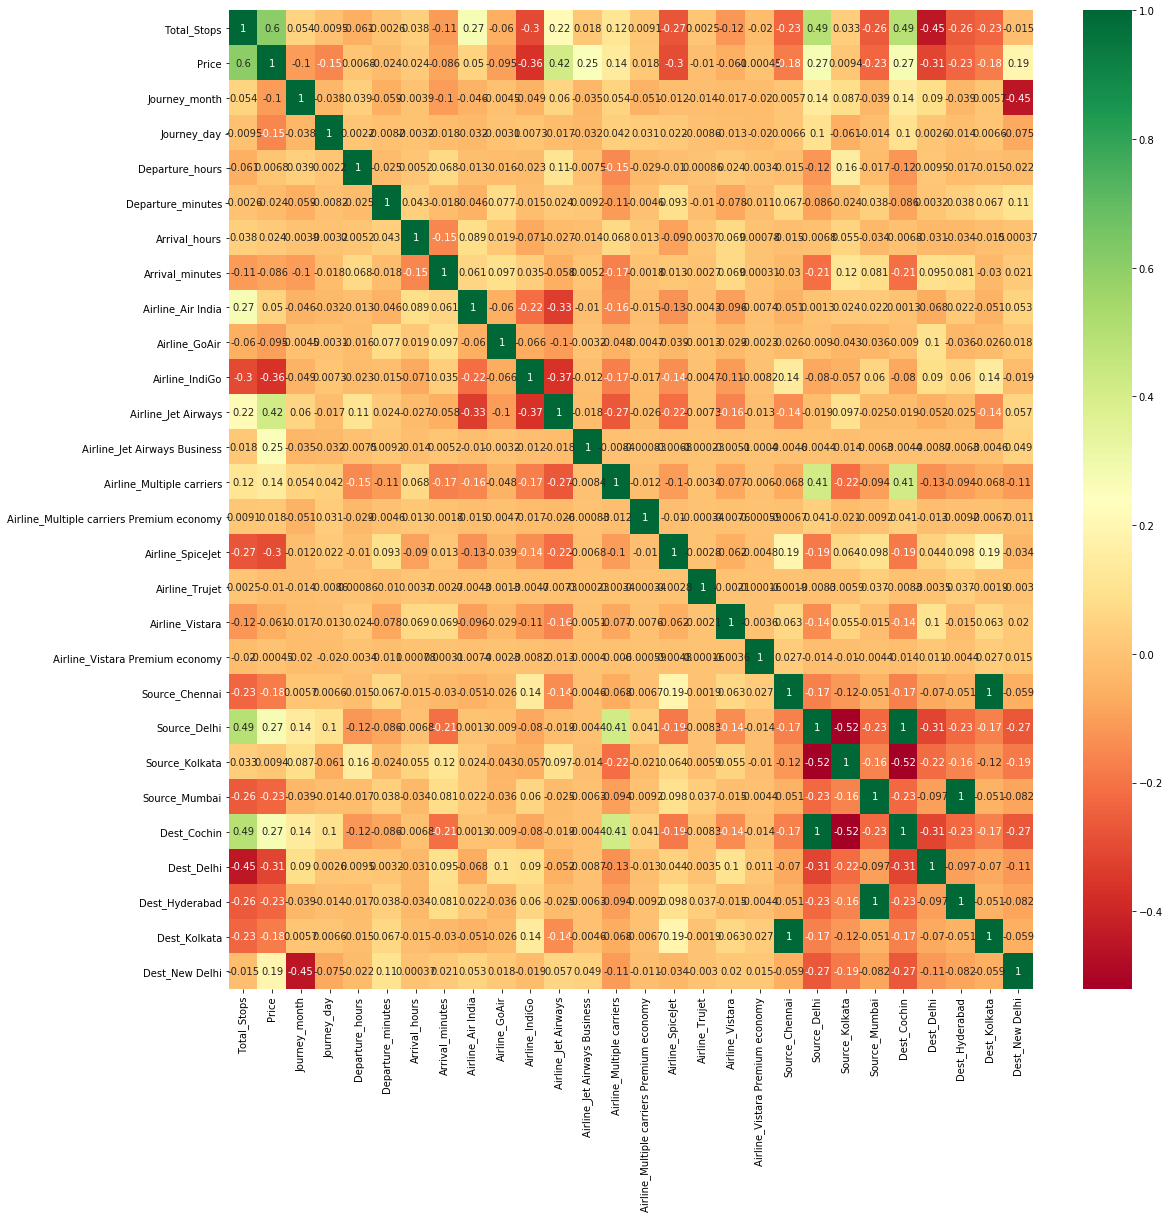

In [32]:
plt.figure(figsize=(18,18))
sns.heatmap(train_data.corr(),annot=True,cmap="RdYlGn")
plt.show()

In [33]:
from sklearn.ensemble import ExtraTreesRegressor

In [34]:
selection= ExtraTreesRegressor()


In [35]:
selection.fit(X,Y)

ExtraTreesRegressor()

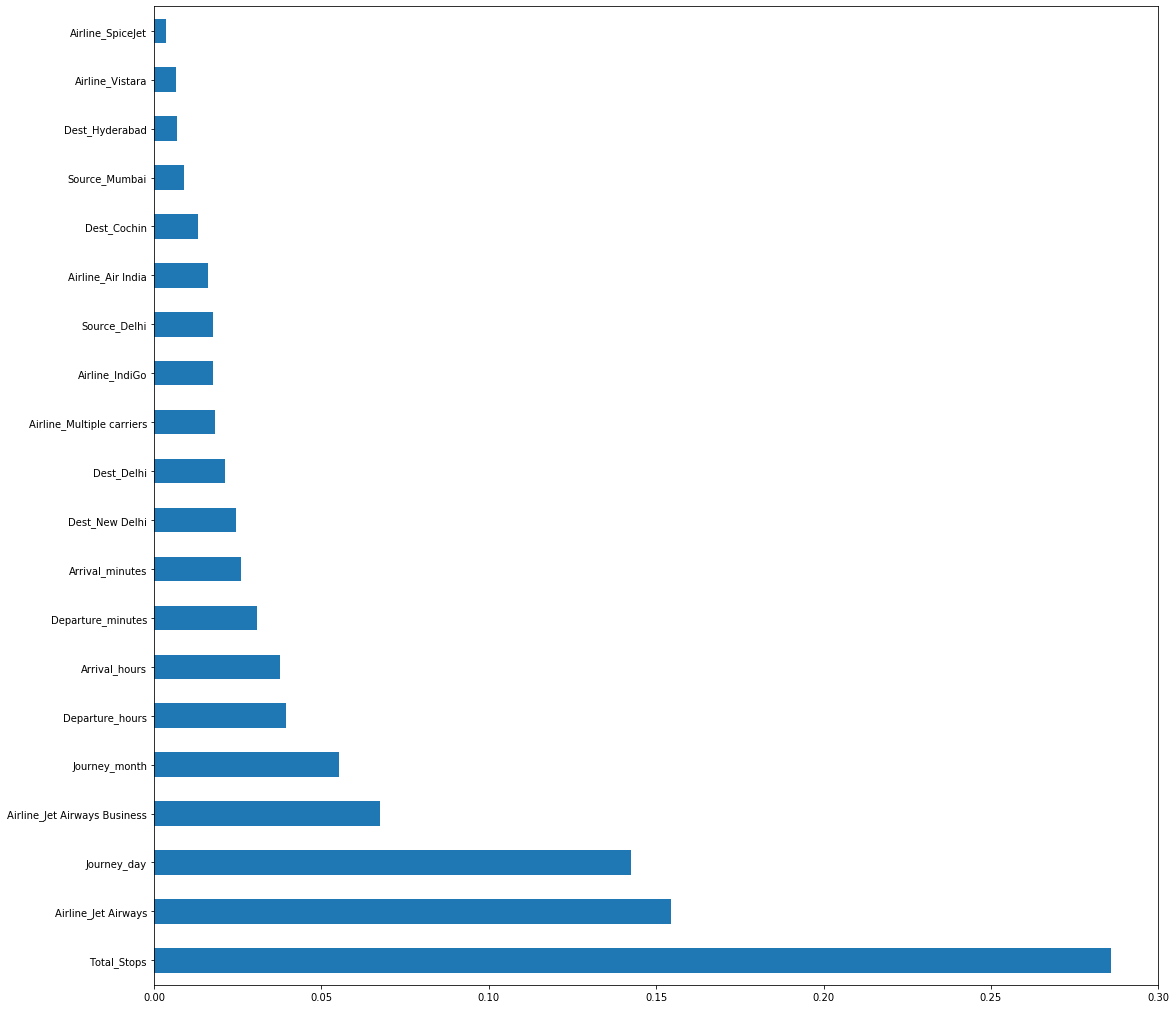

In [36]:
plt.figure(figsize=(18,18))
feature_importances=pd.Series(selection.feature_importances_,index=X.columns)
feature_importances.nlargest(20).plot(kind='barh')
plt.show()

In [37]:
feature_importances.index

Index(['Total_Stops', 'Journey_month', 'Journey_day', 'Departure_hours',
       'Departure_minutes', 'Arrival_hours', 'Arrival_minutes',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Dest_Cochin', 'Dest_Delhi', 'Dest_Hyderabad', 'Dest_Kolkata',
       'Dest_New Delhi'],
      dtype='object')

# Fitting the model

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X[feature_importances.index],Y,test_size=0.2,random_state=42)

# Logistic Regression

In [40]:
lr=LogisticRegression()

In [41]:
params={'penalty':['l2',None],
       'C': [1,2],
       'class_weight': ['balanced',None]}


In [42]:
from sklearn.model_selection import RandomizedSearchCV


In [75]:
lr_random = RandomizedSearchCV(estimator = lr, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [76]:
import warnings
warnings.filterwarnings('ignore')

In [77]:
lr_random.fit(X_train,Y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END .............C=1, class_weight=balanced, penalty=l2; total time=  36.3s
[CV] END .............C=1, class_weight=balanced, penalty=l2; total time=  38.2s
[CV] END .............C=1, class_weight=balanced, penalty=l2; total time=  39.8s
[CV] END .............C=1, class_weight=balanced, penalty=l2; total time=  37.8s
[CV] END .............C=1, class_weight=balanced, penalty=l2; total time=  40.9s
[CV] END ...........C=1, class_weight=balanced, penalty=None; total time=   0.0s
[CV] END ...........C=1, class_weight=balanced, penalty=None; total time=   0.0s
[CV] END ...........C=1, class_weight=balanced, penalty=None; total time=   0.0s
[CV] END ...........C=1, class_weight=balanced, penalty=None; total time=   0.0s
[CV] END ...........C=1, class_weight=balanced, penalty=None; total time=   0.0s
[CV] END .................C=1, class_weight=None, penalty=l2; total time=  36.0s
[CV] END .................C=1, class_weight=None,

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=1,
                   param_distributions={'C': [1, 2],
                                        'class_weight': ['balanced', None],
                                        'penalty': ['l2', None]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [78]:
lr_random.best_params_

{'penalty': 'l2', 'class_weight': None, 'C': 1}

In [79]:
prediction = lr_random.predict(X_test)

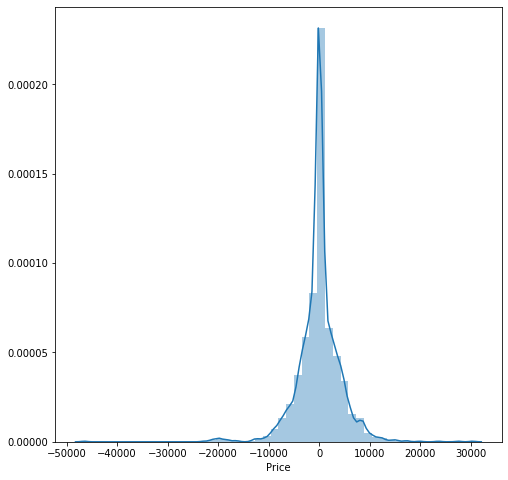

In [80]:
plt.figure(figsize = (8,8))
sns.distplot(Y_test-prediction)
plt.show()

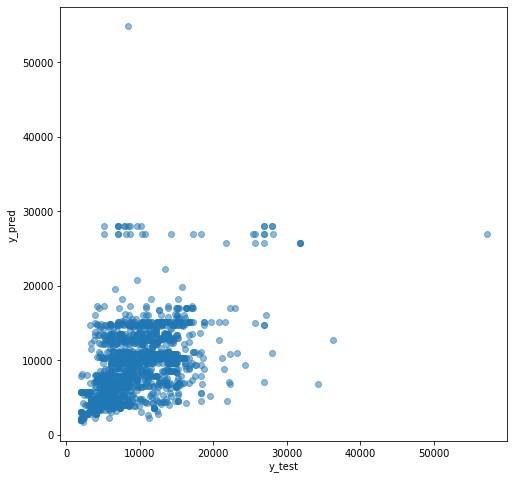

In [81]:
plt.figure(figsize = (8,8))
plt.scatter(Y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [82]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
print('MAE:', mean_absolute_error(Y_test, prediction))
print('MSE:', mean_squared_error(Y_test, prediction))
print('RMSE:', np.sqrt(mean_squared_error(Y_test, prediction)))

MAE: 2653.733270940571
MSE: 18520731.142723445
RMSE: 4303.5719051415235


# Random Forest

In [83]:
from sklearn.ensemble import RandomForestRegressor

In [84]:
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [85]:
predictions=rf.predict(X_test)

In [86]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [87]:
import math as m
print("MAE Score is : " , mean_absolute_error(Y_test,predictions))
print("RMSE Score is : " , m.sqrt(mean_squared_error(Y_test,predictions)))

MAE Score is :  1144.8560340232352
RMSE Score is :  1850.243414183744


# Hyper Parameter Tuning For Random Forest Model

In [88]:
from sklearn.model_selection import RandomizedSearchCV

In [89]:
#Randomized Search CV
import numpy as np
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [90]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [91]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [92]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [93]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [94]:
prediction = rf_random.predict(X_test)

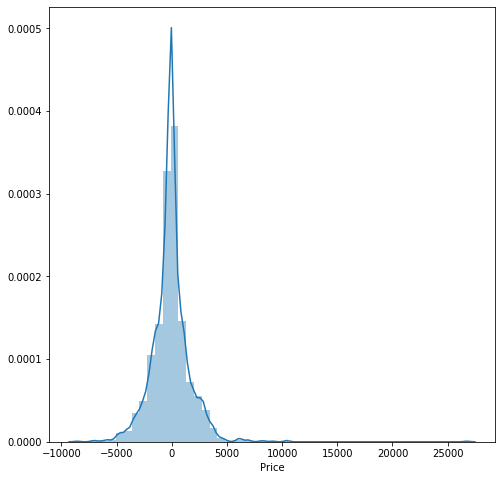

In [95]:
plt.figure(figsize = (8,8))
sns.distplot(Y_test-prediction)
plt.show()

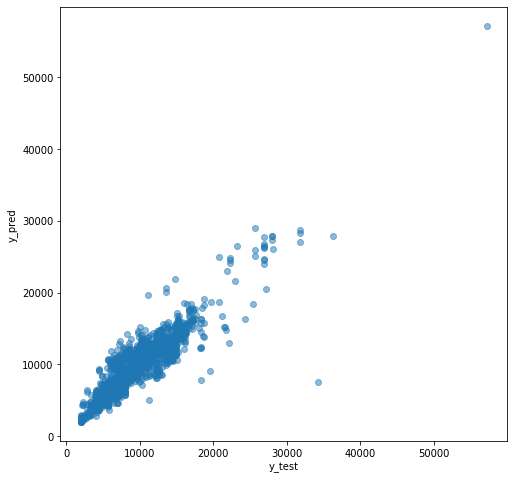

In [96]:
plt.figure(figsize = (8,8))
plt.scatter(Y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [97]:
print('MAE:', mean_absolute_error(Y_test, prediction))
print('MSE:', mean_squared_error(Y_test, prediction))
print('RMSE:', np.sqrt(mean_squared_error(Y_test, prediction)))

MAE: 1132.1230149158766
MSE: 3096404.222329592
RMSE: 1759.6602576433872
